# Introduction

This data science assignment focuses on studying a house rent dataset to discern the factors influencing rental pricing and their relationships. Our analysis spans critical data science stages, including exploration, preprocessing, feature engineering, model building, and evaluation.

We aim to document the entire workflow, presenting key findings and challenges. The ultimate goal is to develop a machine learning predictive model that enhances our understanding of rental pricing dynamics. Through this study, we seek to contribute valuable insights to the real estate domain.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [2]:
df = pd.read_csv("House_Rent_Dataset.csv")
df.sample(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2404,6/27/2022,2,16000,100,3 out of 3,Super Area,Rohini Sector 24,Delhi,Unfurnished,Bachelors,2,Contact Owner
3847,5/16/2022,2,15000,1050,1 out of 2,Super Area,Medavakkam,Chennai,Semi-Furnished,Bachelors/Family,2,Contact Owner
3072,7/8/2022,2,11000,800,1 out of 2,Super Area,Perungudi,Chennai,Unfurnished,Bachelors/Family,1,Contact Owner
4533,5/7/2022,2,7500,1350,Ground out of 1,Super Area,Rampally,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
1364,5/27/2022,1,32000,475,3 out of 4,Super Area,Andheri East,Mumbai,Furnished,Bachelors/Family,1,Contact Owner


# Basic data information

Upon analyzing the dataset, it becomes evident that this pertains to a housing rental dataset specific to India, as indicated by the city and area locality columns. Notably, we observed distinctions in terminology between India's housing descriptions and those commonly used in Malaysia. For instance, terms such as BHK (Bedroom, Hall, Kitchen) and various area types like carpet area, built area, and super area are prevalent.

To gain a comprehensive understanding, let's define the significance of these terms:

### Rent
The rental value will be denominated in Indian Rupees (INR), which is the official currency of India. 1000 Rupee = 55.70 MYR as of 4 Jan 2023.

### BHK
This acronym denotes the composition of residential units, encompassing the number of bedrooms, hall, and kitchen. It serves as a standardized classification for property configurations.

- **3 BHK:** This indicates a residential unit comprising three separate rooms designated as bedrooms, a hall, typically serving as a common area, and a kitchen.

### Area Type
In the context of housing, the area type refers to the categorization of spaces within a property. Common classifications include carpet area, built area, and super area, each delineating different measurements and spatial characteristics.

- **Carpet Area:** The actual usable area within the walls of a property, excluding the thickness of internal walls. It represents the space where one can lay a carpet.
    
- **Built Area (or Built-Up Area):** The total area occupied by the walls, including the carpet area and thickness of the walls. It encompasses all enclosed spaces.
    
- **Super Area (or Super Built-Up Area):** The total built-up area along with a proportional share of common spaces like corridors, stairs, and lobby. It represents the entire space one is investing in, including shared areas.

### City
In the "City" column, we observe entries such as Numbai, Delhi, Kolkata, Bengalore (officially renamed to Bengaluru), Chennai, and Hyderabad. These cities align with the top six cities in India, ranked by Gross Domestic Product (GDP) in 2022, listed in order of their respective ranks.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [4]:
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [5]:
df.duplicated().value_counts()

False    4746
Name: count, dtype: int64

### Observation
We've examined a dataset comprising 4746 rows and 12 columns, and we're pleased to report that there are no empty rows or columns. Additionally, there are no duplicated records in the dataset.

# Data cleanup

In [6]:
for col in ['Area Type', 'City', 'Furnishing Status', 'Bathroom', 'Area Locality', 'Tenant Preferred', 'Point of Contact']:
    print(f"Values for {df[col].name}:\n{df[col].unique()}\n")

Values for Area Type:
['Super Area' 'Carpet Area' 'Built Area']

Values for City:
['Kolkata' 'Mumbai' 'Bangalore' 'Delhi' 'Chennai' 'Hyderabad']

Values for Furnishing Status:
['Unfurnished' 'Semi-Furnished' 'Furnished']

Values for Bathroom:
[ 2  1  3  5  4  6  7 10]

Values for Area Locality:
['Bandel' 'Phool Bagan, Kankurgachi' 'Salt Lake City Sector 2' ...
 'BN Reddy Nagar' 'Godavari Homes, Quthbullapur' 'Manikonda, Hyderabad']

Values for Tenant Preferred:
['Bachelors/Family' 'Bachelors' 'Family']

Values for Point of Contact:
['Contact Owner' 'Contact Agent' 'Contact Builder']



In [7]:
df['Floor'].value_counts()

Floor
1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: count, Length: 480, dtype: int64

### Floor cleanup
We noted that the "Floor" column contains string data in the format "X out of Y," where X and Y are integer numbers. However, there are exceptions where the values for X are "Ground," "Upper Basement," and "Lower Basement," which can be conveniently mapped to 1, -1, and -2, respectively. To handle this, we plan to split the string by "out of" to extract the values for X and Y. Subsequently, we will create new columns named "Floor Level" and "Total Floors" and, consequently, remove the original "Floor" column.

#### Floor splitting

In [8]:
df = df.join(
    df['Floor'].str
        .split(' out of ', n=1, expand=True)
        .rename(columns={
            0:'Floor Level', 
            1:'Total Floors'
        })
)
df.drop('Floor', axis=1, inplace=True)

#### Floor level mapping

In [9]:
floor_level_mapping = {
    'Ground': 0,
    'Upper Basement': -1,
    'Lower Basement': -2,
}
df['Floor Level'].replace(floor_level_mapping, inplace=True)
df.dropna(inplace=True)
df['Floor Level'] = df['Floor Level'].astype('int')
df['Total Floors'] = df['Total Floors'].astype('int')

#### Categorise string columns

Convert string columns to category data type, so it is easier to convert to unique integer later.

In [10]:
area_type_order = ['Super Area', 'Built Area', 'Carpet Area']
furnishing_status_order = ['Unfurnished', 'Semi-Furnished', 'Furnished']
city_order = ['Hyderabad', 'Chennai', 'Bangalore', 'Kolkata', 'Delhi', 'Mumbai']

df['Area Type'] = pd.Categorical(df['Area Type'], categories=area_type_order, ordered=True)
df['Furnishing Status'] = pd.Categorical(df['Furnishing Status'], categories=furnishing_status_order, ordered=True)
df['City'] = pd.Categorical(df['City'], categories=city_order, ordered=True)
df['Area Locality'] = pd.Categorical(df['Area Locality'])
df['Tenant Preferred'] = pd.Categorical(df['Tenant Preferred'])
df['Point of Contact'] = pd.Categorical(df['Point of Contact'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4742 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Posted On          4742 non-null   object  
 1   BHK                4742 non-null   int64   
 2   Rent               4742 non-null   int64   
 3   Size               4742 non-null   int64   
 4   Area Type          4742 non-null   category
 5   Area Locality      4742 non-null   category
 6   City               4742 non-null   category
 7   Furnishing Status  4742 non-null   category
 8   Tenant Preferred   4742 non-null   category
 9   Bathroom           4742 non-null   int64   
 10  Point of Contact   4742 non-null   category
 11  Floor Level        4742 non-null   int64   
 12  Total Floors       4742 non-null   int64   
dtypes: category(6), int64(6), object(1)
memory usage: 411.5+ KB


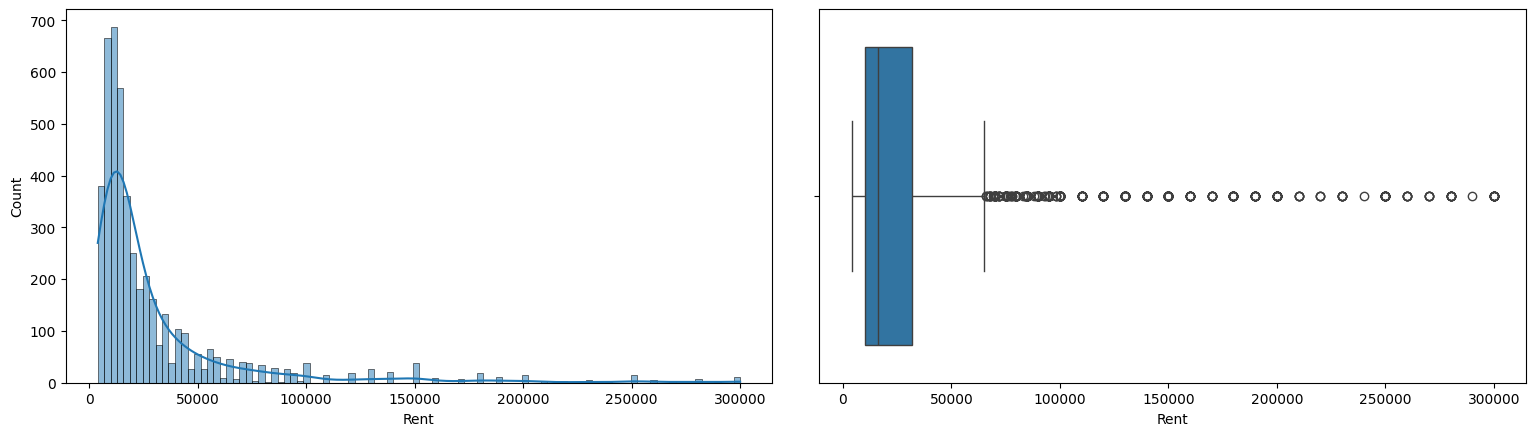

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))
sns.histplot(ax=axes[0], data=df, x='Rent', bins=100, kde=True)
sns.boxplot(ax=axes[1], data=df, x='Rent', orient='h')
plt.tight_layout(pad=3.0)
plt.show()

### Rent outliers
We noticed outliers in the rent amount from the graph. To address this issue, we intend to eliminate outliers by considering the 1st percentile (lower threshold) and the 99th percentile (upper threshold).

In [12]:
upper_limit = df['Rent'].quantile(0.99)
lower_limit = df['Rent'].quantile(0.01)
df = df[ (df['Rent'] >= lower_limit) & (df['Rent'] <= upper_limit) ]
# for later
train_data = df.copy()

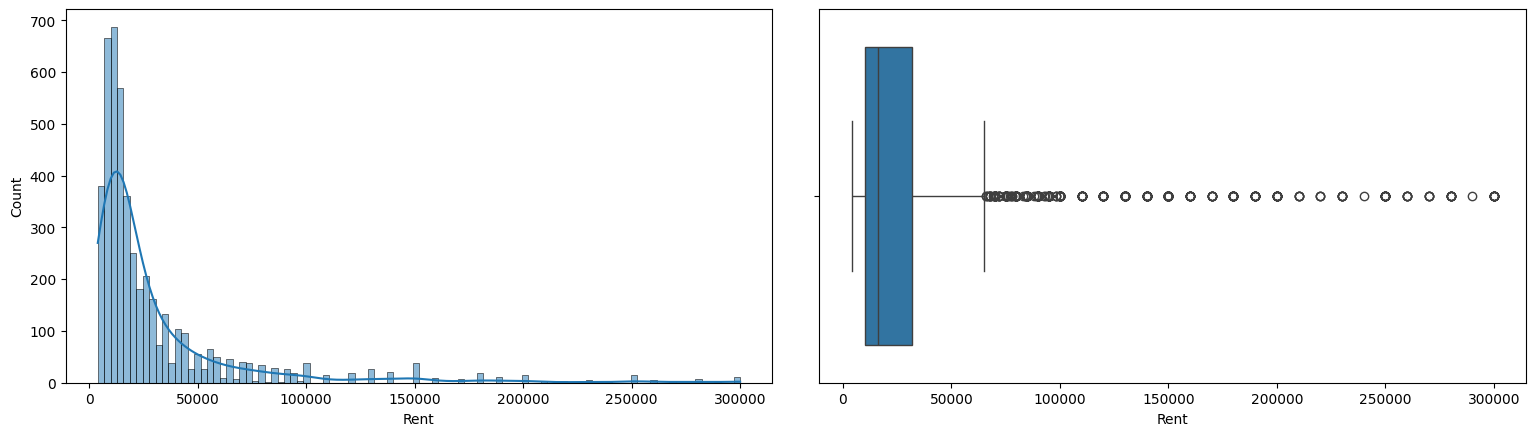

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))
sns.histplot(ax=axes[0], data=df, x='Rent', bins=100, kde=True)
sns.boxplot(ax=axes[1], data=df, x='Rent', orient='h')

plt.tight_layout(pad=3.0)
plt.show()

# Data Analytic

## Hypothesis 1: City-wise Rent Variation

- **Hypothesis:** Rental prices vary significantly across different cities.
- **Rationale:** Real estate markets in different cities can have distinct characteristics, economic factors, and demand levels, influencing rental prices.


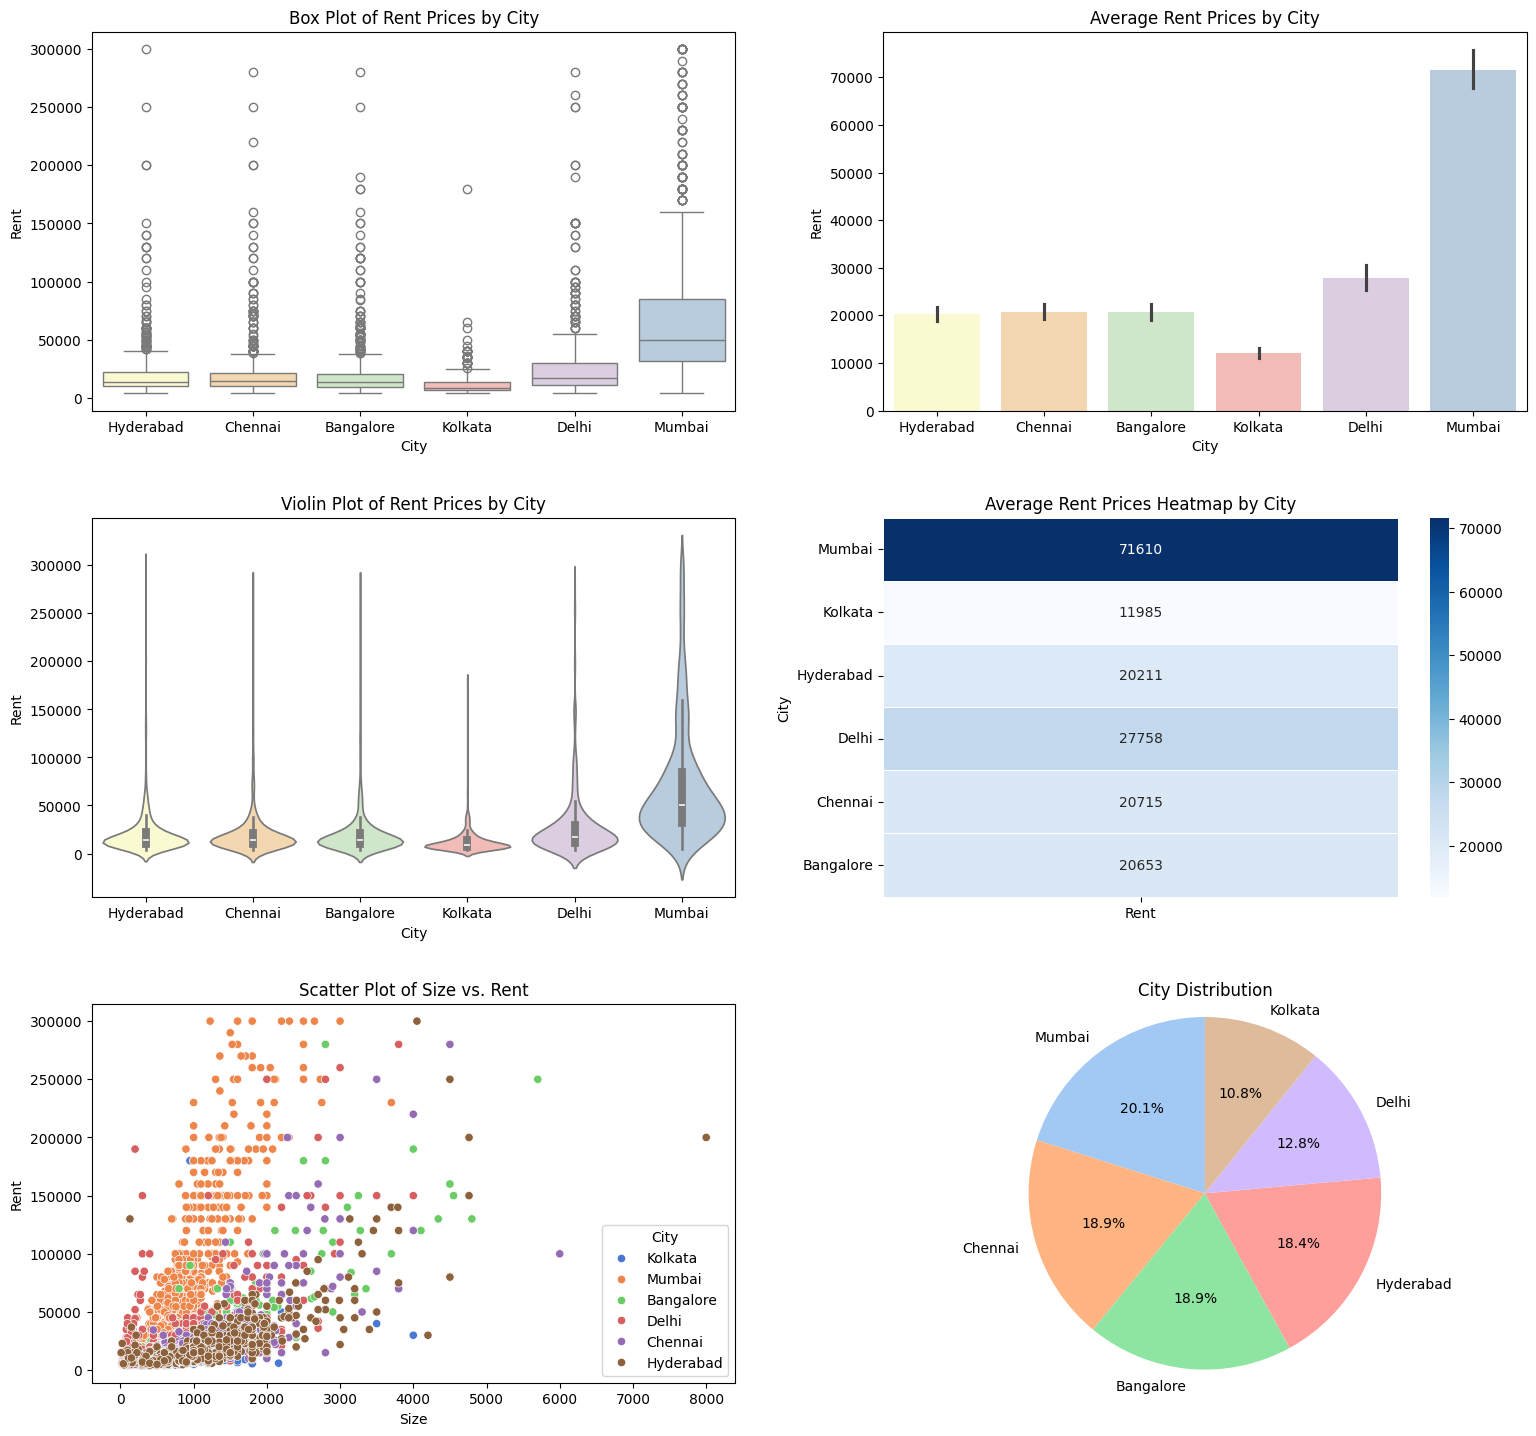

In [55]:
# Convert 'City' to string type if it's categorical
df['City'] = df['City'].astype(str)
# Group data by 'City'
grouped_data = df.groupby('City')
# Create a pivot table
pivot_table = df.pivot_table(index='City', values='Rent', aggfunc='mean')

fig, axes = plt.subplots(3, 2, figsize=(16,15))
# Box plots
sns.boxplot(x='City', y='Rent', data=df.reset_index(), order=city_order, hue='City', palette='Pastel1', ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Rent Prices by City')

# Bar chart
sns.barplot(x='City', y='Rent', data=df.reset_index(), estimator=np.mean, order=city_order, ax=axes[0, 1], palette='Pastel1', hue='City')
axes[0, 1].set_title('Average Rent Prices by City')

# Violin plots
sns.violinplot(x='City', y='Rent', data=df.reset_index(), order=city_order, ax=axes[1, 0], palette='Pastel1', hue='City')
axes[1, 0].set_title('Violin Plot of Rent Prices by City')

# Heatmap
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt=".0f", linewidths=.5, ax=axes[1, 1])
axes[1, 1].set_title('Average Rent Prices Heatmap by City')
axes[1, 1].invert_yaxis()

# Scatter plot
sns.scatterplot(x='Size', y='Rent', hue='City', data=df.reset_index(), ax=axes[2, 0], palette='muted')
axes[2, 0].set_title('Scatter Plot of Size vs. Rent')

# Pie chart
data = df['City'].value_counts()
axes[2, 1].pie(
    data, 
    labels=data.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette('pastel'),
    textprops={'fontsize':10}
)
axes[2, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[2, 1].set_title('City Distribution')

plt.tight_layout(pad=3.0)
plt.show()

### Conclusion for City-wise Rent Variation Hypothesis

1. **Rent Price and City's Economic Status:**
   - Rental prices exhibit a strong correlation with the economic status of cities. Mumbai, with the highest GDP, boasts the highest mean rent price, approximately 2.5 times more than the second-ranking city, Delhi.
   - Mumbai's mean rent of 71,610 is significantly higher than other cities, indicating a premium in the rental market. This observation is supported by evidence from violin plots, scatter plots, and box plots, highlighting a substantial number of high-value rental properties in Mumbai.
2. **City-wise House Availability for Rent:**
   - Mumbai also leads in terms of the percentage of houses available for rent, accounting for 20.1% of the total. This dominance is indicative of both high demand and supply in the rental market.
   - Following Mumbai, Bangalore, Chennai, and Hyderabad rank 2nd to 4th in terms of the percentage of houses for rent, ranging from 18.4% to 18.9%. Despite having lower GDPs, these cities demonstrate robust demand and supply for rental properties.
3. **Delhi's Position and Rental Dynamics:**
   - Delhi, ranking 2nd in terms of mean rent, lags significantly behind Mumbai. However, it maintains a higher mean rent compared to other cities, albeit not by a considerable margin.
   - Delhi's share of houses for rent is 12.8%, indicating a relatively balanced rental market with moderate demand and supply.
4. **Kolkata's Unique Scenario:**
   - Kolkata, ranking 3rd in GDP, stands out with the lowest mean rent and the smallest percentage of houses for rent at 10.8%. Despite its economic standing, the rental market in Kolkata appears less dynamic, suggesting lower demand and supply.

### In Summary
- **Economic Status and Rent Prices:** Rental prices are predominantly influenced by the economic status of cities, with exceptions like Kolkata.
- **Mumbai's Dominance:** Mumbai stands out with both significantly higher mean rents and a larger share of the rental market.
- **Regional Dynamics:** Bangalore, Chennai, and Hyderabad, despite lower GDPs, exhibit high demand and supply, emphasizing robust rental dynamics.
- **Delhi's Balanced Market:** Delhi, while ranking 2nd, maintains a balanced rental market with moderate demand and supply.
- **Kolkata's Distinct Market:** Kolkata, despite its economic rank, experiences lower demand and supply, resulting in lower mean rents and a smaller share of houses for rent.

## Hypothesis 2: Size and Rent Correlation

- **Hypothesis:** The size (square footage) of a rental property is positively correlated with the rent amount.
- **Rationale:** Larger-sized properties are likely to have more living space and amenities, potentially leading to higher rental prices.

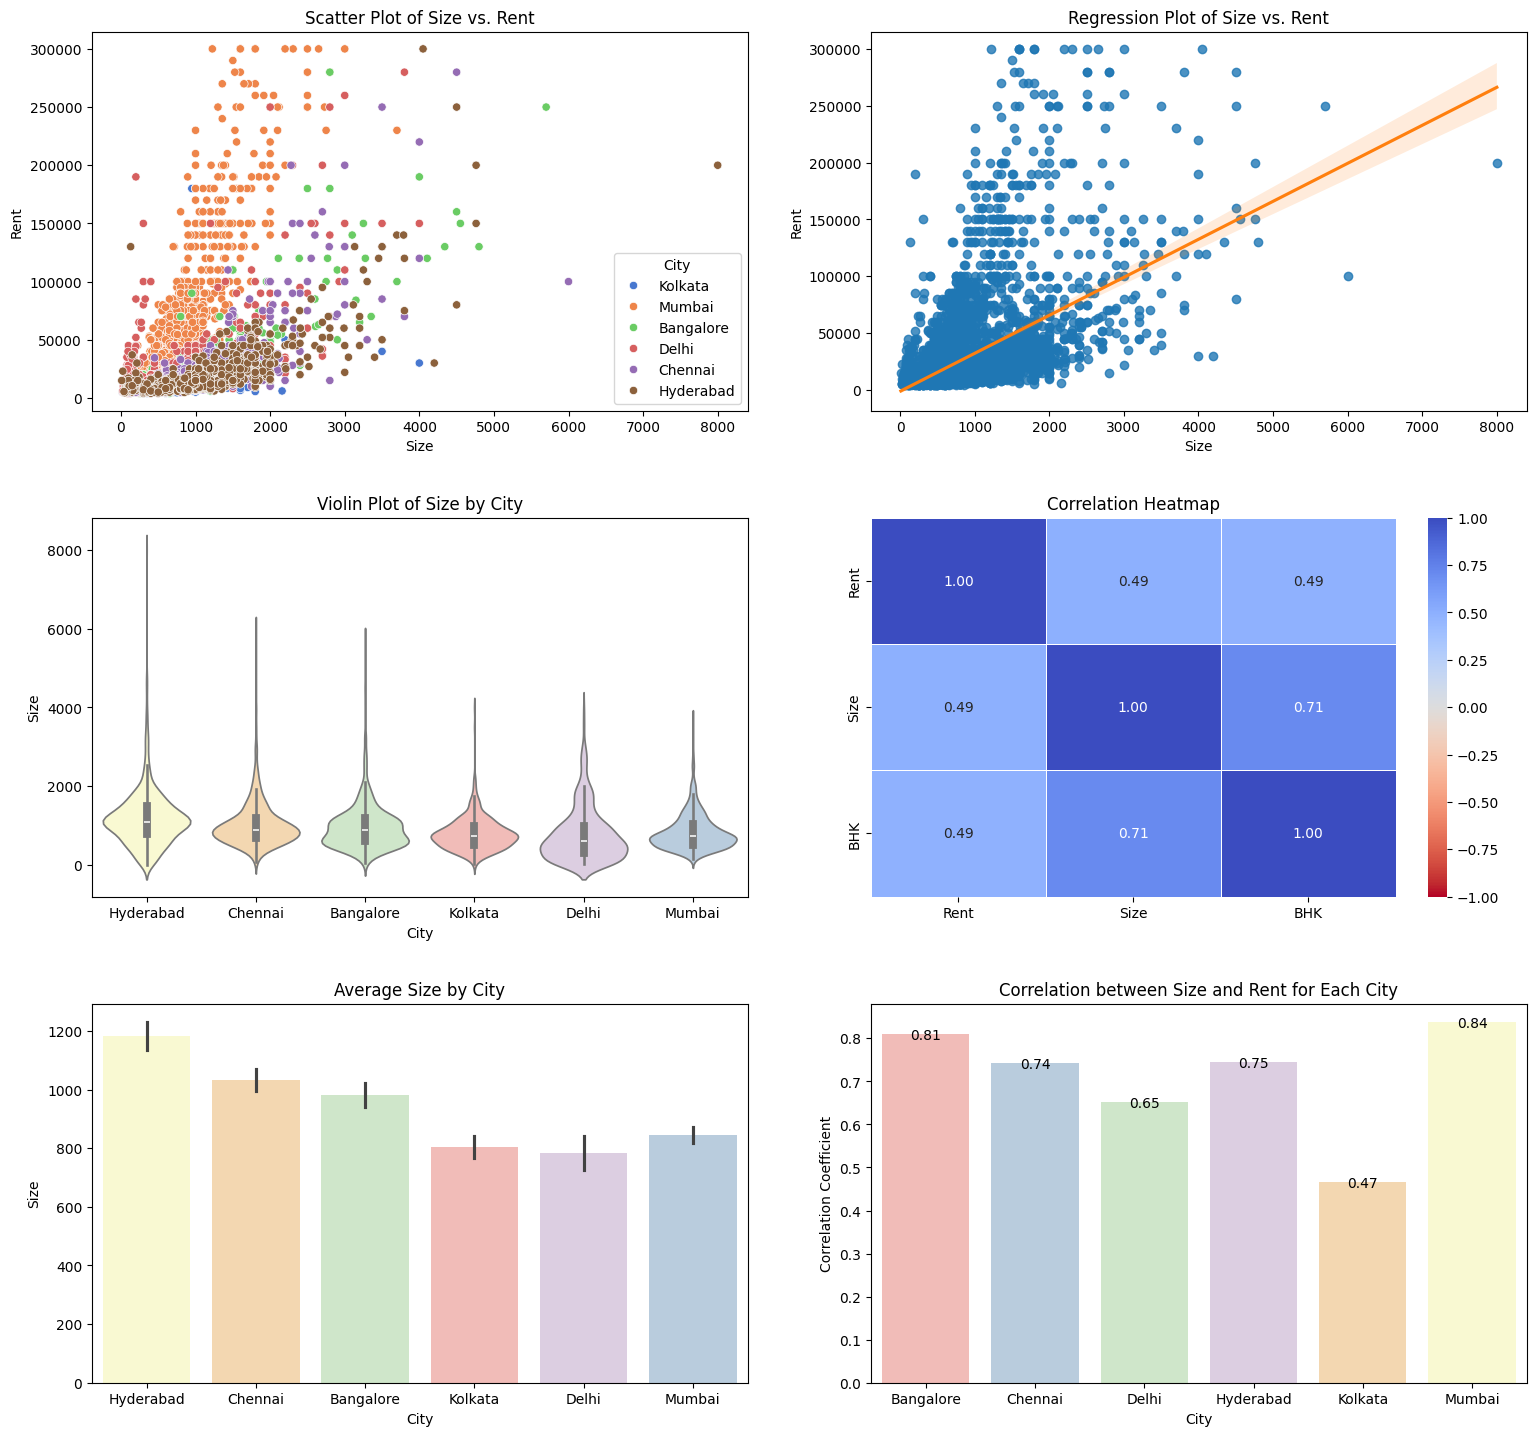

In [54]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 15))

# Scatter Plot (Size vs. Rent)
sns.scatterplot(x='Size', y='Rent', hue='City', data=df.reset_index(), ax=axes[0, 0], palette='muted')
axes[0, 0].set_title('Scatter Plot of Size vs. Rent')
axes[0, 0].set_xlabel('Size')
axes[0, 0].set_ylabel('Rent')

# Regression Plot (Size vs. Rent) - Optional
sns.regplot(x='Size', y='Rent', data=df, ax=axes[0, 1], line_kws={"color": "C1"})
axes[0, 1].set_title('Regression Plot of Size vs. Rent')
axes[0, 1].set_xlabel('Size')
axes[0, 1].set_ylabel('Rent')

# Violin Plot
numeric_columns = df[['Rent', 'Size', 'BHK']]
correlation_matrix = numeric_columns.corr()
sns.violinplot(x='City', y='Size', data=df.reset_index(), order=city_order, ax=axes[1, 0], palette='Pastel1', hue='City')
axes[1, 0].set_title('Violin Plot of Size by City')

# Set up the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', fmt=".2f", linewidths=.5, vmin=-1.0, vmax=1.0, ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap')

# Bar Plot
sns.barplot(x='City', y='Size', data=df.reset_index(), estimator=np.mean, order=city_order, ax=axes[2, 0], palette='Pastel1', hue='City')
axes[2, 0].set_title('Average Size by City')

# Bar Plot
correlations_by_city = df.groupby('City')[['Size', 'Rent']].corr().loc[(slice(None), 'Size'), 'Rent']
correlations_by_city = correlations_by_city.reset_index(level='City').rename(columns={'Rent': 'Correlation'})
bar_plot = sns.barplot(x='City', y='Correlation', data=correlations_by_city, palette='Pastel1', ax=axes[2, 1], hue='City')
axes[2, 1].set_title('Correlation between Size and Rent for Each City')
axes[2, 1].set_xlabel('City')
axes[2, 1].set_ylabel('Correlation Coefficient')
for index, value in enumerate(correlations_by_city['Correlation']):
    bar_plot.text(index, value, f'{value:.2f}', ha='center', va='center_baseline')

plt.tight_layout(pad=3.0)
plt.show()


### Conclusion for Size and Rent Correlation Hypothesis

1. **City-wise Mean Size:**
   - Mumbai, Delhi, and Kolkata exhibit the lowest mean property sizes, indicating that these cities generally have smaller rental properties on average.
2. **Hyderabad's Distinctiveness:**
   - Hyderabad stands out with the highest mean property size. This observation is further supported by the violin plot, emphasizing that Hyderabad has a notable number of larger-sized rental properties.
3. **Size and Economic Status:**
   - There is an inverse relationship between the average and maximum property sizes and the GDP of the cities. Cities with lower GDPs tend to have larger rental properties, suggesting a potential affordability factor in larger but economically less prosperous cities.
4. **Moderate Overall Correlation:**
   - Across all cities, there is a moderate positive correlation (0.49) between property size and rent. This suggests that, in general, larger-sized properties tend to have higher rental prices.
5. **City-specific Correlations:**
    - Mumbai, Bangalore, Hyderabad, and Chennai demonstrate very high correlations between size and rent, with coefficients ranging from 0.74 to 0.84. This indicates a strong positive relationship, emphasizing that larger-sized properties in these cities command higher rents.
   - Delhi and Kolkata, however, exhibit lower correlations (0.65 and 0.47, respectively). This aligns with Hypothesis 1, where we identified that Delhi and Kolkata have lower supply and demand in the rental market, potentially contributing to a weaker correlation between size and rent.
7. **Rate of Increase for Size vs Rent in Different Cities:**
    - Mumbai (Correlation Coefficient: 0.84): Strong positive correlation, indicating a substantial increase in rent for larger properties. High rate of increase in rent as property size grows.
    - Bangalore (Correlation Coefficient: 0.81): Strong positive correlation, with a considerable increase in rent for larger properties. High rate of increase in rent in relation to property size.
    - Hyderabad (Correlation Coefficient: 0.75): Strong positive correlation, signifying a significant rent increase with larger properties. Notable rate of increase in rent as property size increases.
    - Chennai (Correlation Coefficient: 0.74): Strong positive correlation, indicating a substantial rent increase for larger properties. High rate of increase in rent with growing property size.
    - Delhi (Correlation Coefficient: 0.65): Positive correlation, suggesting that larger properties generally have higher rents. Slightly lower rate of increase compared to Mumbai, Bangalore, Hyderabad, and Chennai.
    - Kolkata (Correlation Coefficient: 0.47): Weaker positive correlation, implying a less pronounced impact of size on rent. Relatively lower rate of increase in rent with larger properties.

### In Summary
- The mean size varies among cities, with Hyderabad having the largest properties and Mumbai, Delhi, and Kolkata having smaller ones on average.
- The size and rental dynamics show an interesting inverse relationship with the economic status of cities.
- A moderate positive correlation exists between size and rent across all cities, but the strength of this correlation varies by city. Mumbai, Bangalore, Hyderabad, and Chennai demonstrate a particularly strong relationship, while Delhi and Kolkata exhibit weaker associations, in line with their unique rental market dynamics.

## Hypothesis 3: Total Floors and Rent Perception

- **Hypothesis:** The total number of floors in a building affects the perception of the property, influencing the rent.
- **Rationale:** Higher or lower floor counts might be associated with different views, noise levels, and accessibility, impacting the perceived value and rental amount.

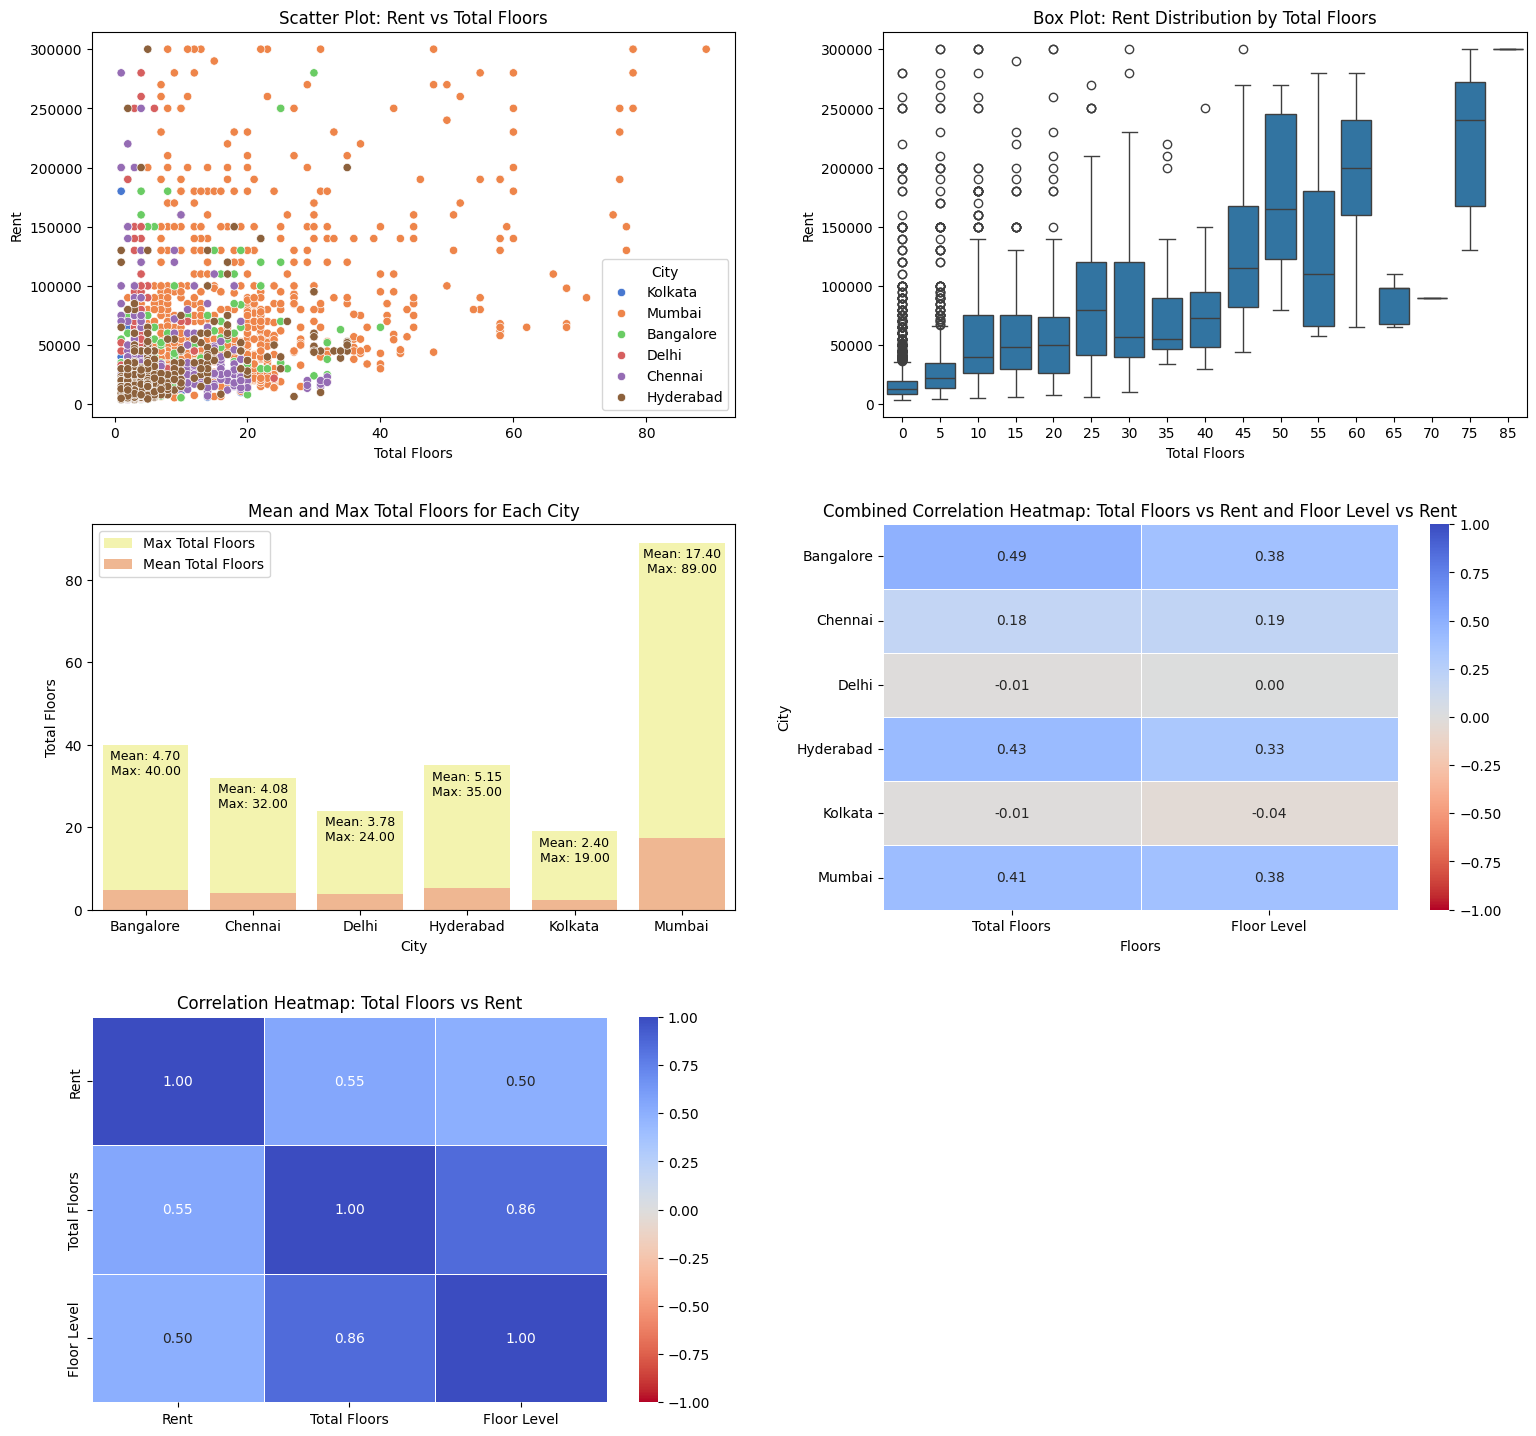

In [53]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 15))

# Scatter Plot: Rent vs Total Floors
sns.scatterplot(x='Total Floors', y='Rent', data=df, ax=axes[0, 0], hue='City', palette='muted')
axes[0, 0].set_title('Scatter Plot: Rent vs Total Floors')
axes[0, 0].set_xlabel('Total Floors')
axes[0, 0].set_ylabel('Rent')

# Box Plot: Rent Distribution by Total Floors
df['Grouped Floors'] = df['Total Floors'] // 5 * 5
sns.boxplot(x='Grouped Floors', y='Rent', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot: Rent Distribution by Total Floors')
axes[0, 1].set_xlabel('Total Floors')
axes[0, 1].set_ylabel('Rent')

# Bar plot
city_floor_stats = df.groupby('City')['Total Floors'].agg(['mean', 'max']).reset_index()
bar_plot = sns.barplot(x='City', y='max', data=city_floor_stats, color='#fffea3', ax=axes[1, 0], label='Max Total Floors')
sns.barplot(x='City', y='mean', data=city_floor_stats, color='#ffb482', ax=axes[1, 0], label='Mean Total Floors')

axes[1, 0].set_title('Mean and Max Total Floors for Each City')
axes[1, 0].set_xlabel('City')
axes[1, 0].set_ylabel('Total Floors')
axes[1, 0].legend()

# Add labels for each bar in the bar plot
for idx, row in city_floor_stats.iterrows():
    mean_value = row['mean']
    max_value = row['max']
    axes[1, 0].text(idx, max_value - 8, f'Mean: {mean_value:.2f}\nMax: {max_value:.2f}',
                   ha='center', va='bottom', color='black', size=9)

# Calculate correlations for Total Floors and Grouped Floors
correlation_matrix_total_floors = df.groupby('City')[['Total Floors', 'Rent']].corr().reset_index()
correlation_matrix_grouped_floors = df.groupby('City')[['Grouped Floors', 'Rent']].corr().reset_index()

# Combine correlation matrices without 'Rent' column
correlation_matrix_total_floors = df.groupby('City')[['Total Floors', 'Rent']].corr().reset_index()
correlation_matrix_grouped_floors = df.groupby('City')[['Floor Level', 'Rent']].corr().reset_index()
combined_correlation_matrix = pd.concat([
    correlation_matrix_total_floors.pivot(index='City', columns='level_1', values='Rent').drop('Rent', axis=1),
    correlation_matrix_grouped_floors.pivot(index='City', columns='level_1', values='Rent').drop('Rent', axis=1)
], axis=1)
sns.heatmap(combined_correlation_matrix, annot=True, cmap='coolwarm_r', fmt=".2f", linewidths=.5, vmin=-1.0,vmax=1.0, ax=axes[1, 1])
axes[1, 1].set_title('Combined Correlation Heatmap: Total Floors vs Rent and Floor Level vs Rent')
axes[1, 1].set_xlabel('Floors')

# Correlation Heatmap
correlation_matrix = df[['Rent', 'Total Floors', 'Floor Level']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', fmt=".2f", linewidths=.5, vmin=-1.0,vmax=1.0, ax=axes[2, 0])
axes[2, 0].set_title('Correlation Heatmap: Total Floors vs Rent')

fig.delaxes(axes[2, 1])

# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()


### Conclusion for Total Floors and Rent Perception Hypothesis
1. **Mumbai's Vertical Dominance:**
   - Mumbai emerges as the city with the highest mean and maximum total floors at 17.4 and 89, respectively.
   - Signifying a prevalence of high-rise apartments, Mumbai's figures significantly surpass Bangalore, the second-highest city, boasting a maximum of 40 floors and a mean of 4.7.
2. **Comparative Building Structures:**
   - Bangalore, Hyderabad, and Chennai exhibit comparable mean and maximum floor levels.
   - Maximum floors range from 32 to 40, while mean floors range from 4.08 to 5.15, suggesting a similarity in building structures across these cities.
3. **Distinct Characteristics of Delhi and Kolkata:**
   - Delhi and Kolkata share similar characteristics, ranking lower in both maximum (24 and 19, respectively) and mean (3.78 and 2.4, respectively) total floors.
   - These cities demonstrate a distinct pattern in their rental market dynamics.
4. **Correlation Metrics:**
   - The overall correlation between rent and total floors is 0.55, indicating a positive relationship.
   - The correlation between rent and floor level is 0.5, further highlighting the upward trend of rent with higher total floors and floor levels.
5. **City-Specific Correlations:**
   - City-specific correlations vary, with Delhi and Kolkata showing correlations close to zero (ranging from -0.04 to 0.00) between rent and total floors or floor levels.
   - This suggests a unique characteristic in these cities, where there is no clear relationship between these variables.

### In Summary
- The analysis reveals a general trend of rent increasing with higher total floors and floor levels.
- However, the degree of correlation varies among cities, with Delhi and Kolkata showing unique characteristics in their rental market dynamics.

## Hypothesis 4: Furnishing Status Influence

- **Hypothesis:** Furnishing status has an impact on the rent amount.
- **Rationale:** Properties with different furnishing statuses (e.g., unfurnished, semi-furnished) may command different rental prices due to the convenience they offer.

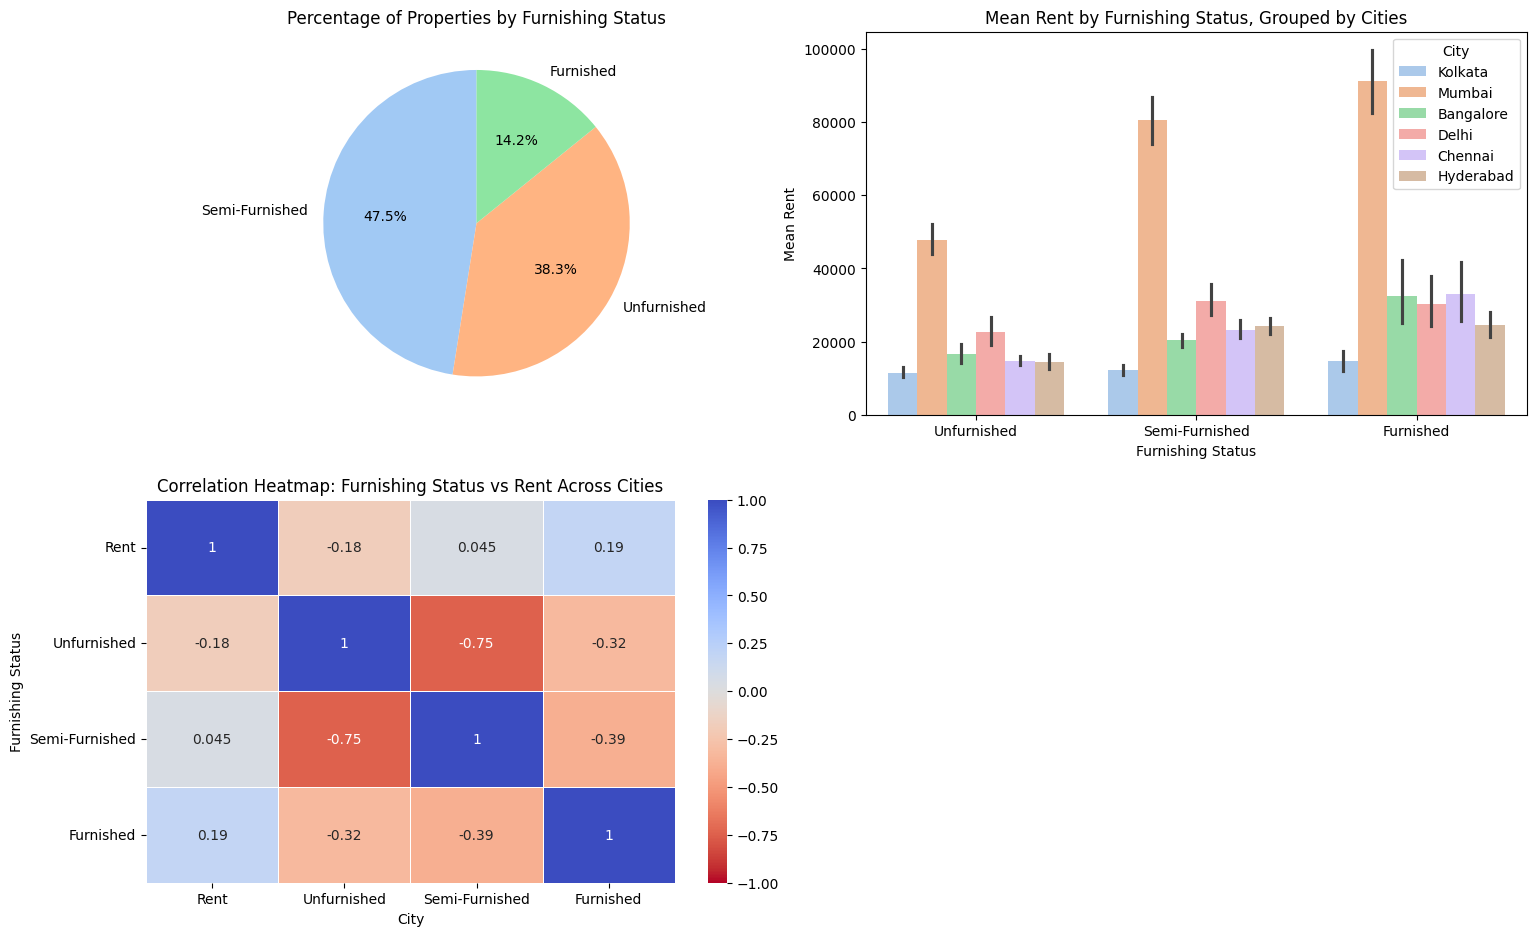

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# 2. Count of Properties by Furnishing Status - Pie Chart
furnishing_status_counts = df['Furnishing Status'].value_counts()
axes[0, 0].pie(furnishing_status_counts, labels=furnishing_status_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0, 0].set_title('Percentage of Properties by Furnishing Status')

# 1. Mean Rent by Furnishing Status, Grouped by Cities
sns.barplot(x='Furnishing Status', y='Rent', hue='City', data=df, estimator='mean', ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Mean Rent by Furnishing Status, Grouped by Cities')
axes[0, 1].set_xlabel('Furnishing Status')
axes[0, 1].set_ylabel('Mean Rent')
axes[0, 1].legend(title='City')

# 3. Heatmap: Correlation for Furnishing Status vs Rent
corr_furnishing_rent = pd.concat([df['Rent'], pd.get_dummies(df['Furnishing Status'], prefix='', prefix_sep='')], axis=1).corr()
sns.heatmap(corr_furnishing_rent, annot=True, cmap='coolwarm_r', vmin=-1.0, vmax=1.0, linewidths=.5, ax=axes[1, 0])
axes[1, 0].set_title('Correlation Heatmap: Furnishing Status vs Rent Across Cities')
axes[1, 0].set_xlabel('City')
axes[1, 0].set_ylabel('Furnishing Status')

fig.delaxes(axes[1, 1])

# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()


### Conclusion for Furnishing Status Influence Hypothesis:
1. **Furnishing Distribution:**
   - Unfurnished properties constitute 38.3% of the dataset, semi-furnished properties make up 47.5%, while furnished properties represent 14.2%. The prevalence of semi-furnished units suggests a common preference.
2. **Correlation with Rent:**
   - Unfurnished: The correlation between unfurnished status and rent is -0.18, indicating a slight negative correlation. Rent tends to be slightly lower for unfurnished properties.
   - Semi-furnished: The correlation between semi-furnished status and rent is 0.045, suggesting a weak positive correlation. Semi-furnished properties show a marginal tendency for higher rents.
   - Furnished: The correlation between furnished status and rent is 0.19, indicating a modest positive correlation. Furnished properties are associated with slightly higher rents.

### In Summary
The dataset reflects a preference for semi-furnished properties. While there is a slight negative correlation between rent and unfurnished properties, both semi-furnished and furnished properties show weak positive correlations with rent. Furnishing status does influence rent, but the effect is relatively modest.

## Hypothesis 5: The Basement Floor Level and Rent Correlation

- **Hypothesis:** The floor level of a rental property (basement, ground floor, above ground) is correlated with the rental amount.
- **Rationale:** Different floor levels may offer varying benefits and drawbacks, influencing the perceived value of a property. Basement and ground floor units may have specific considerations such as accessibility, while above-ground units may offer better views or increased privacy.

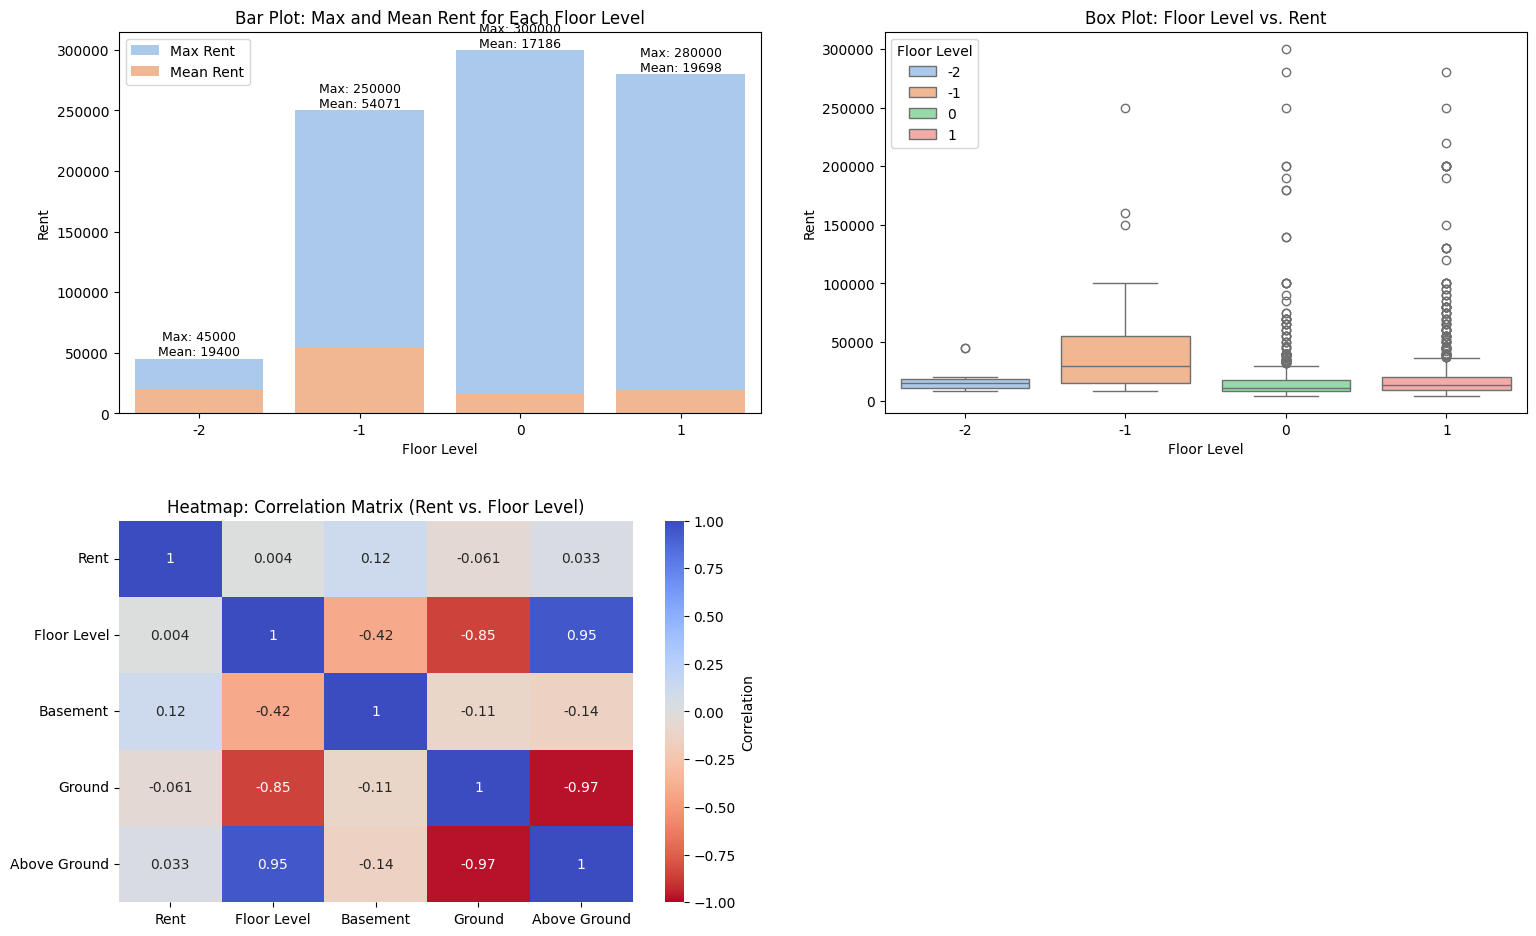

In [51]:
import matplotlib.ticker as ticker
# Narrow down our dataset to focus on floor level lower or equal to 1
data = df[ (df['Floor Level'] <= 1) ]
data = data.loc[:, ['Rent', 'Floor Level', 'City']]
data['Basement'] = data['Floor Level'] < 0
data['Ground'] = data['Floor Level'] == 0
data['Above Ground'] = data['Floor Level'] > 0

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Scatter plot: Floor Level vs. Rent
floor_level_stats = data.groupby('Floor Level')['Rent'].agg(['max', 'mean']).reset_index()
sns.barplot(x='Floor Level', y='max', data=floor_level_stats, color=sns.color_palette("pastel")[0], ax=axes[0, 0], label='Max Rent')
sns.barplot(x='Floor Level', y='mean', data=floor_level_stats, color=sns.color_palette("pastel")[1], ax=axes[0, 0], label='Mean Rent')
axes[0, 0].set_title('Bar Plot: Max and Mean Rent for Each Floor Level')
axes[0, 0].set_xlabel('Floor Level')
axes[0, 0].set_ylabel('Rent')
axes[0, 0].legend()

for i, floor_level in enumerate(floor_level_stats['Floor Level']):
    max_value = int(floor_level_stats.iloc[i]['max'])
    mean_value = int(floor_level_stats.iloc[i]['mean'])
    axes[0, 0].text(i, max_value,
                f'Max: {max_value}\nMean: {mean_value}',
                ha='center', va='bottom', fontsize=9)

# Box plot: Floor Level vs. Rent
sns.boxplot(x='Floor Level', y='Rent', data=data, palette='pastel', hue='Floor Level', ax=axes[0, 1])
axes[0, 1].set_title('Box Plot: Floor Level vs. Rent')
axes[0, 1].set_xlabel('Floor Level')
axes[0, 1].set_ylabel('Rent')

# Heatmap: Correlation Matrix
correlation_matrix = data[ ['Rent', 'Floor Level', 'Basement', 'Ground', 'Above Ground'] ].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', cbar_kws={'label': 'Correlation'}, vmax=1.0, vmin=-1.0, ax=axes[1, 0])
axes[1, 0].set_title('Heatmap: Correlation Matrix (Rent vs. Floor Level)')

fig.delaxes(axes[1, 1])
plt.tight_layout(pad=3.0)
plt.show()


### Conclusion for Hypothesis 5: The Basement Floor Level and Rent Correlation
After conducting a thorough analysis of the rental data based on floor levels, we arrive at the following conclusions:

1. **Basement Floor Level:**
   - Basement units exhibit a noticeable disparity between lower basement and upper basement in terms of rental values.
   - Lower basement units have a significantly lower maximum and mean rent, recorded at 45,000 and 19,400, respectively.
   - In contrast, upper basement units command higher rental values, with a maximum rent of 160,000 and a mean rent of 44,275.
   - The data suggests that lower basement units may not be as popular among tenants and consequently fetch lower rental values.
2. **Correlation Analysis:**
   - The correlation between the basement floor level and rent is moderately positive, with a correlation coefficient of 0.099.
   - Ground floor units show a slightly negative correlation with rent, indicated by a correlation coefficient of -0.077.
   - Above-ground units (specifically level 1) exhibit a modest positive correlation with rent, with a correlation coefficient of 0.053.
   - These correlation values suggest that while there is a relationship between floor level and rent, the influence is very weak.

### In summary
The analysis supports the hypothesis that different floor levels, especially lower basement units, have varying impacts on rental values. Understanding these correlations can assist property owners and tenants in making informed decisions based on their preferences and requirements.

# Predictive Model

## Data Preprocessing

We relook at the train data that we copied from dataframe after data cleanup.

In [19]:
train_data.head()

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Level,Total Floors
0,5/18/2022,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,5/13/2022,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,5/16/2022,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,7/4/2022,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,5/9/2022,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


We will remove columns that might not have meaningful impact for rental prediction model.

In [20]:
train_data.drop(['Posted On', 'Area Locality', 'Point of Contact', 'Tenant Preferred'], axis=1, inplace=True)

In [21]:
train_data.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Floor Level,Total Floors
0,2,10000,1100,Super Area,Kolkata,Unfurnished,2,0,2
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,1,1,3
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,1,1,3
3,2,10000,800,Super Area,Kolkata,Unfurnished,1,1,2
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,1,1,2


## Feature Engineering

We will perform one hot encoding for columns like Area Type, City, Furnishing Status.

In [22]:
for attribute in ['City', 'Area Type', 'Furnishing Status']:
    ohe = pd.get_dummies(train_data[attribute], prefix=attribute, prefix_sep=' ')
    train_data = pd.concat([train_data, ohe], axis=1)
    train_data.drop(attribute, axis=1, inplace=True)

In [23]:
train_data.head()

,BHK,Rent,Size,Bathroom,Floor Level,Total Floors,City Hyderabad,City Chennai,City Bangalore,City Kolkata,City Delhi,City Mumbai,Area Type Super Area,Area Type Built Area,Area Type Carpet Area,Furnishing Status Unfurnished,Furnishing Status Semi-Furnished,Furnishing Status Furnished
0,2,10000,1100,2,0,2,False,False,False,True,False,False,True,False,False,True,False,False
1,2,20000,800,1,1,3,False,False,False,True,False,False,True,False,False,False,True,False
2,2,17000,1000,1,1,3,False,False,False,True,False,False,True,False,False,False,True,False
3,2,10000,800,1,1,2,False,False,False,True,False,False,True,False,False,True,False,False
4,2,7500,850,1,1,2,False,False,False,True,False,False,False,False,True,True,False,False


After one hot encoding, we successful removed all string values, all attributes can be represented numerically. 

array([[<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'BHK'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Floor Level'}>],
       [<Axes: title={'center': 'Total Floors'}>, <Axes: >]], dtype=object)

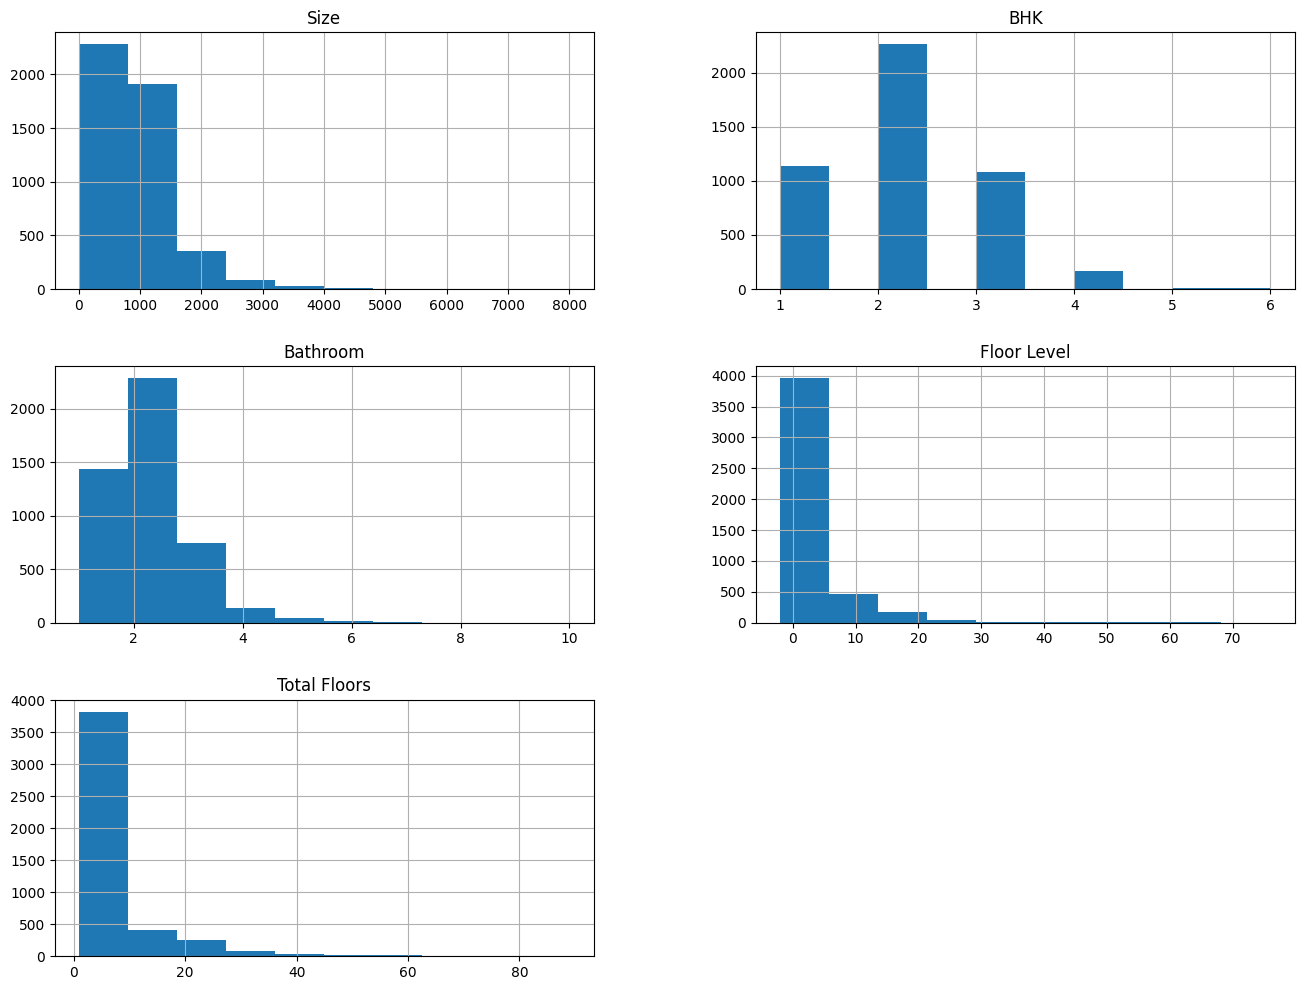

In [24]:
train_data[[ 'Size', 'BHK', 'Bathroom', 'Floor Level', 'Total Floors' ] ].hist(figsize=(16,12))

We observed skewed distribution. We shall apply log transformation.

array([[<Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'BHK'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Floor Level'}>],
       [<Axes: title={'center': 'Total Floors'}>, <Axes: >]], dtype=object)

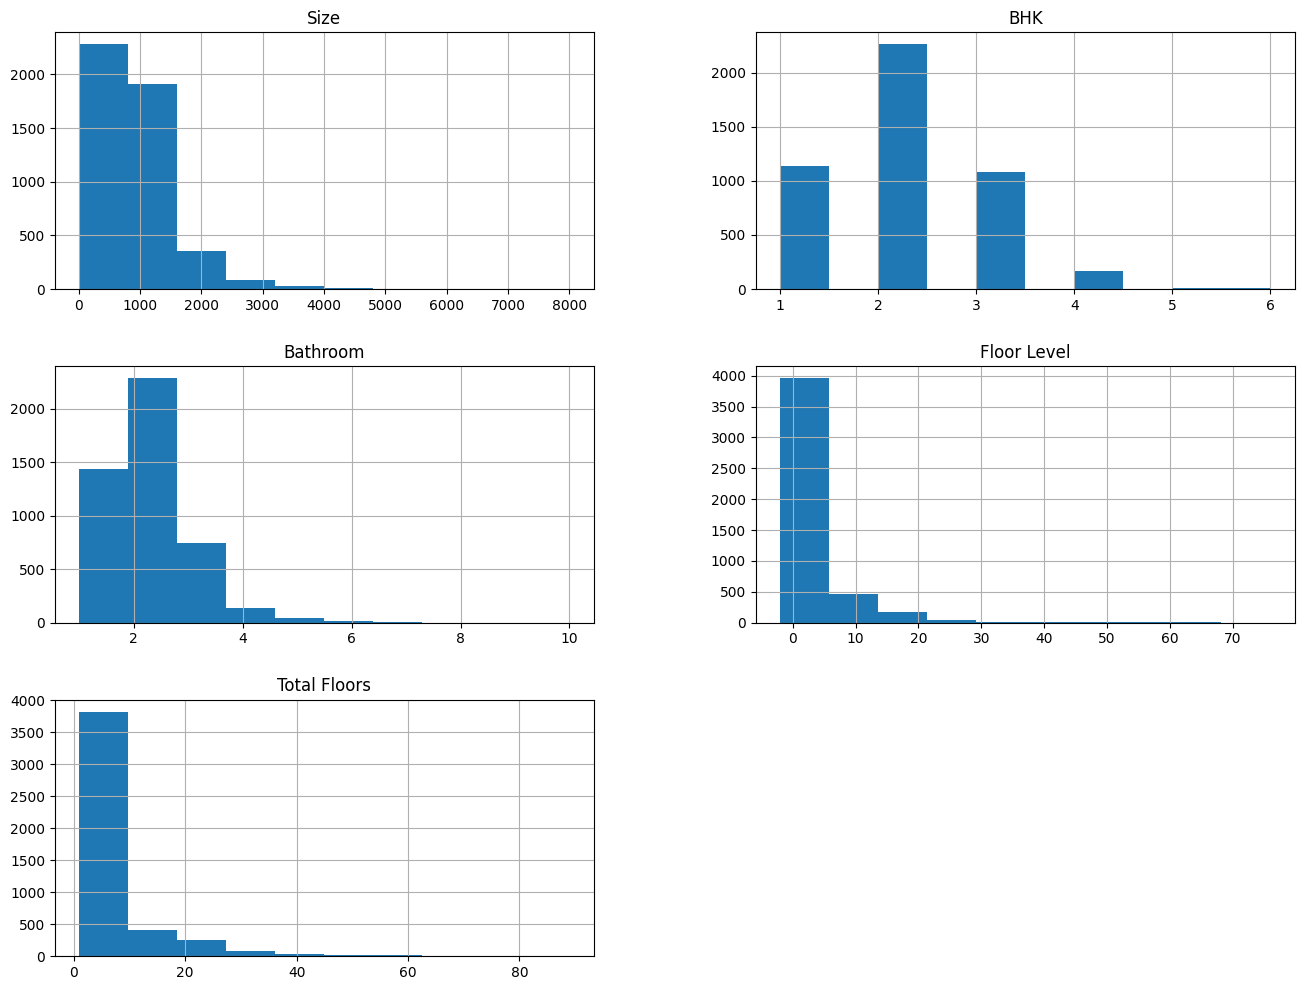

In [25]:
train_data[[ 'Size', 'BHK', 'Bathroom', 'Floor Level', 'Total Floors' ] ].hist(figsize=(16,12))

In [26]:
train_data['BHK'] = np.log(train_data['BHK'] + 1)
train_data['Size'] = np.log(train_data['Size'] + 1)
train_data['Bathroom'] = np.log(train_data['Bathroom'] + 1)
train_data['Floor Level'] = np.log(train_data['Floor Level'] + 3)
train_data['Total Floors'] = np.log(train_data['Total Floors'] + 1)

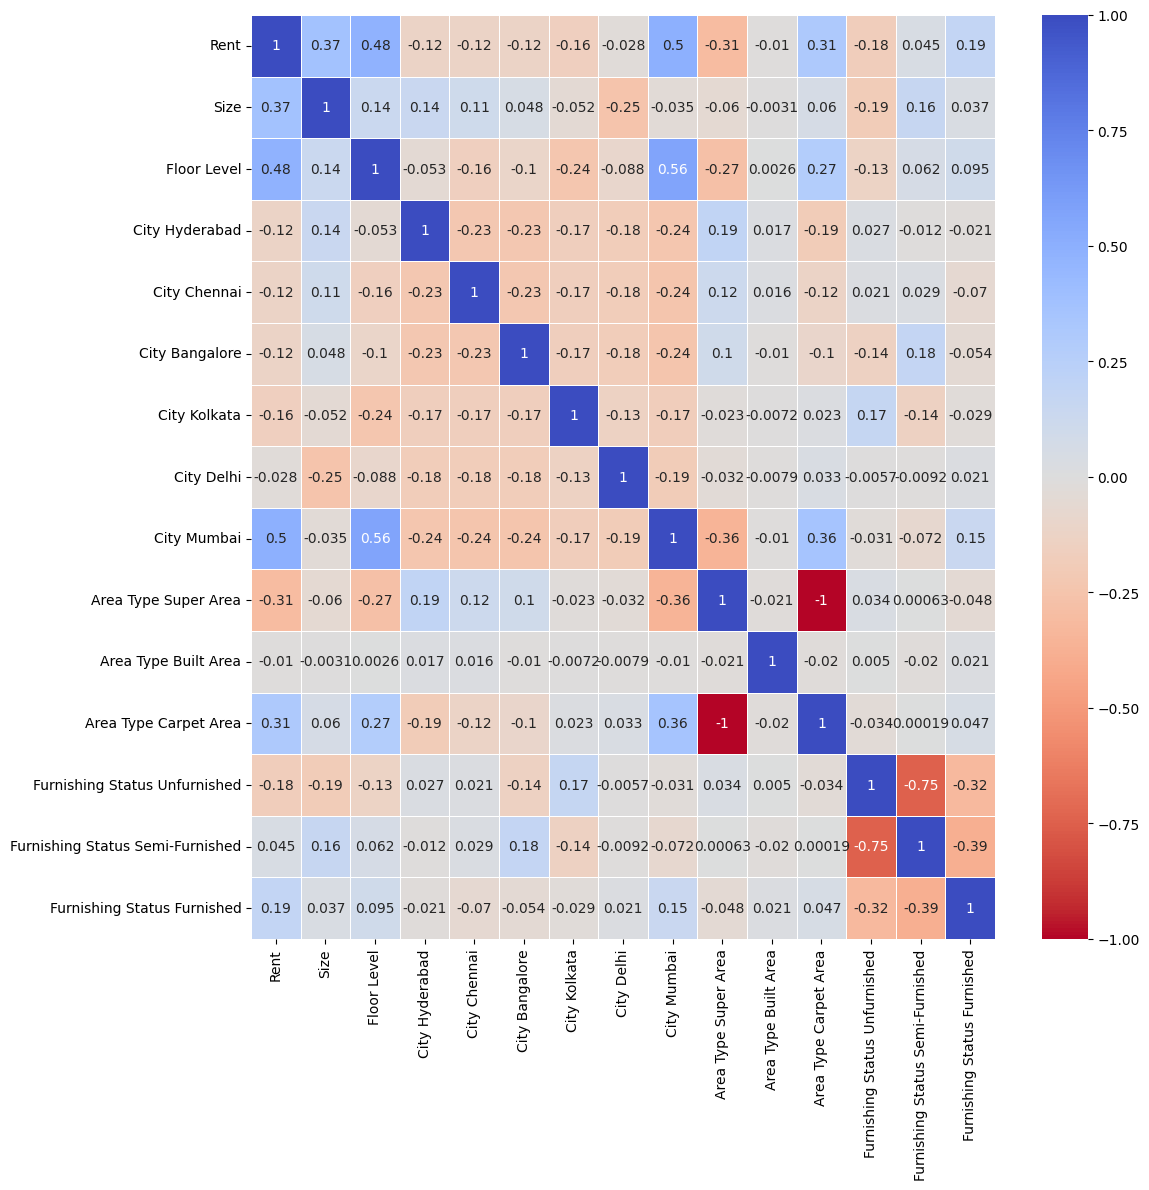

In [58]:
plt.figure(figsize=(12,12))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm_r', vmin=-1.0, vmax=1.0, linewidths=.5)
plt.show()

To handle issues of collinearity:
- Drop BHK, Bathroom and keep Size
- Drop Total Floors and keep Floor Level

In [28]:
train_data.drop(['BHK', 'Bathroom', 'Total Floors'], axis=1, inplace=True)

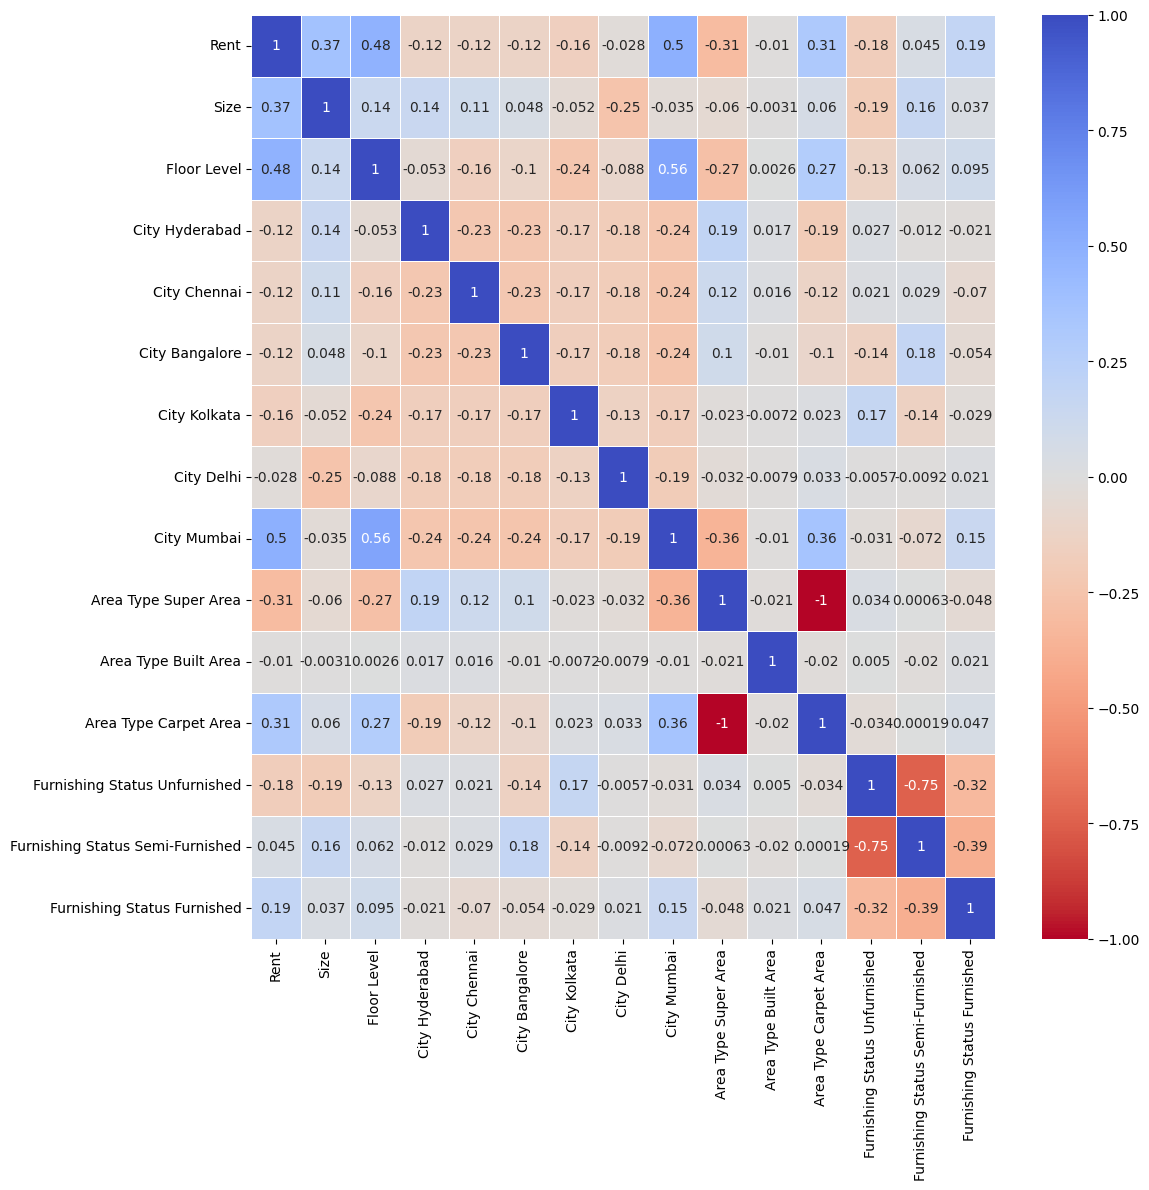

In [59]:
plt.figure(figsize=(12,12))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm_r', vmin=-1.0, vmax=1.0, linewidths=.5)
plt.show()

In [30]:
train_data.head()

,Rent,Size,Floor Level,City Hyderabad,City Chennai,City Bangalore,City Kolkata,City Delhi,City Mumbai,Area Type Super Area,Area Type Built Area,Area Type Carpet Area,Furnishing Status Unfurnished,Furnishing Status Semi-Furnished,Furnishing Status Furnished
0,10000,7.003974,1.098612,False,False,False,True,False,False,True,False,False,True,False,False
1,20000,6.685861,1.386294,False,False,False,True,False,False,True,False,False,False,True,False
2,17000,6.908755,1.386294,False,False,False,True,False,False,True,False,False,False,True,False
3,10000,6.685861,1.386294,False,False,False,True,False,False,True,False,False,True,False,False
4,7500,6.746412,1.386294,False,False,False,True,False,False,False,False,True,True,False,False


## Model Building & Evaluation

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

We will split our training and testing data, and apply standard scaler to Size and Floor level columns. 

In [32]:
scaler = StandardScaler()
X = train_data.drop(['Rent'], axis=1)
y = train_data['Rent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# Initialize regression models
linear_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()
tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()

# List of regression models
models = [linear_reg, ridge_reg, lasso_reg, tree_reg, random_forest_reg]

# Train and evaluate each model
for model in models:
    # Train the model
    model.fit(X_train_s, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_s)

    # Calculate and print evaluation metrics
    mse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {type(model).__name__}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")
    print("-" * 40)

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_s, y_train)
y_pred_knn = knn.predict(X_test_s)

# Evaluate performance
mse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
r2_knn = r2_score(y_test, y_pred_knn)

print("K-Nearest Neighbors Regressor:")
print(f"Mean Squared Error (MSE): {mse_knn}")
print(f"R-squared Score: {r2_knn}")
print("-" * 40)

gbr = GradientBoostingRegressor()
gbr.fit(X_train_s, y_train)
y_pred_gbr = gbr.predict(X_test_s)

# Evaluate performance
mse_gbr = mean_squared_error(y_test, y_pred_gbr, squared=False)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regressor:")
print(f"Mean Squared Error (MSE): {mse_gbr}")
print(f"R-squared Score: {r2_gbr}")
print("-" * 40)

Model: LinearRegression
Mean Squared Error: 31048.89768513952
R-squared Score: 0.4043895047497713
----------------------------------------
Model: Ridge
Mean Squared Error: 31016.68194765137
R-squared Score: 0.40562485145927396
----------------------------------------
Model: Lasso
Mean Squared Error: 31017.208442079867
R-squared Score: 0.4056046727786117
----------------------------------------
Model: DecisionTreeRegressor
Mean Squared Error: 28325.91894961681
R-squared Score: 0.5042782368571512
----------------------------------------
Model: RandomForestRegressor
Mean Squared Error: 22582.277077804712
R-squared Score: 0.6849311752906078
----------------------------------------
K-Nearest Neighbors Regressor:
Mean Squared Error (MSE): 22873.69196125767
R-squared Score: 0.6767470434164358
----------------------------------------
Gradient Boosting Regressor:
Mean Squared Error (MSE): 21283.6558492259
R-squared Score: 0.7201260835621821
----------------------------------------


### Evaluating Regression Models

We tested multiple regression models, this is the result:

- **Model: LinearRegression**
    - Mean Squared Error: 29103.508285309257
    - R-squared Score: 0.4592806970759482
- **Model: Ridge**
    - Mean Squared Error: 29048.50295888387
    - R-squared Score: 0.4613226732541148
- **Model: Lasso**
    - Mean Squared Error: 29048.70570911744
    - R-squared Score: 0.46131515360085606
- **Model: DecisionTreeRegressor**
    - Mean Squared Error: 26870.63018811346
    - R-squared Score: 0.5390679691175392
- **Model: RandomForestRegressor**
    - Mean Squared Error: 21436.302670489444
    - R-squared Score: 0.7066534762672353
- **K-Nearest Neighbors Regressor**
    - Mean Squared Error (MSE): 23793.503890886852
    - R-squared Score: 0.638591810690279
- **Gradient Boosting Regressor**
    - Mean Squared Error (MSE): 20440.168735007872
    - R-squared Score: 0.7332833434696864

Based on results, Gradient Boosting Regressor preformed the best with mean squared error at 20440, and R-squared score of 0.733. We will pick Gradient Boosting Regressor as our model to optimize.

We will use GridSearchCV for hyper-tuning, we will share the final result.

**Note:** The following code has been commented off intentionally, to test the tuning process, please uncomment and run the following.

In [34]:
# from sklearn.model_selection import GridSearchCV

# gbr = GradientBoostingRegressor(min_samples_leaf=4)
# gbr.fit(X_train_s, y_train)
# gbr.score(X_test_s, y_test)
# param_grid = {
#     "n_estimators": [100, 200, 300],
#     "learning_rate": [0.1, 0.2, 0.4],
#     "min_samples_split": [8, 12, 16],
#     "max_depth": [3, 4, 5]
# }
# grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
# grid_search.fit(X_train, y_train)

In [36]:
# grid_search.best_estimator_

In [37]:
# best_gbr = grid_search.best_estimator_
# best_gbr.score(X_test, y_test)

### Hyper-tuning result
We tested parameters like: n_estimators, learning_rate, min_samples_split, max_depth, min_samples_leaf, however given the best estimator result, we get a R-squared score of 0.729, which is slightly lower than our initial R-squared score of 0.733. Therefore we will conclude this hyper-tuning excerise and use default Gradient Boosting Regressor since it delivered the best result.

We will export our prediction model as rent_prediction_model.joblib.

In [35]:
import joblib
joblib.dump(gbr, 'rent_model.joblib')

['rent_model.joblib']

# Conclusion

1. Dealing with an Unfamiliar Dataset: The lack of personal experience in India and its housing rental market posed a significant challenge, necessitating a reliance on insights derived solely from the dataset.
2. Uncovering Intriguing Patterns: Despite the unfamiliarity, the analysis revealed compelling findings, such as the notable similarities between Delhi and Kolkata, distinct from the collective characteristics of Hyderabad, Chennai, and Bangalore. Mumbai, on the other hand, exhibited unique attributes.
3. Limitations of the Dataset: While the dataset offers valuable insights into room configurations, size, city, and rent, it has limitations, lacking additional information about amenities, building facilities, parking, proximity to commercial centers, security, and transportation access, which could significantly enhance model development.
4. Model Testing and Selection: Multiple regression models were tested, including Linear Regressor, Ridge, Lasso, Decision Tree Regressor, Random Forest Regressor, KNN Regressor, and Gradient Boosting Regressor. The Gradient Boosting Regressor performed the best with an R-squared score of 0.733, closely followed by the Random Forest Regressor.
5. Hyper-Tuning Challenges: Despite attempts at hyper-tuning, the original model retained its optimal performance, highlighting the intricacies of achieving further improvements.
6. Potential for Neural Network Regression: The exploration of regression analysis using neural networks, such as TensorFlow, remains a future avenue to enhance modeling capabilities.
7. Device Limitations: The current device's constraints in machine learning testing and optimization duration suggest the potential for more extensive parameter testing with improved computational resources.
8. Regional Model Considerations: Acknowledging the diverse housing dynamics across cities, future endeavors may benefit from grouping cities or regions with similar characteristics for more tailored and effective model building.
9. Learning Experience: From data import, cleaning, preprocessing, transformation to model building and tuning, this entire exercise provided a valuable learning experience in the realm of data science.